In [75]:
using DataFrames,CSV,StatsBase, Plots, StatsPlots,LaTeXStrings

In [39]:
get_Data(x::Int) = DataFrame(CSV.File("Question2_Set$x.csv",header=[:y]))
get_hist(df,binning) =  @df df  fit(Histogram, :y, binning ,closed=:left)


get_hist (generic function with 3 methods)

In [131]:
#functions for Allan standard deviation
allan_Var(x) = 1/(2*(length(x)-1)) *sum((x[i+1]-x[i])^2 for i in Iterators.take(eachindex(x),length(x)-1))
binning(x,τ) = [mean(i) for i in Iterators.partition(x,τ)]

binning (generic function with 1 method)

In [124]:
τs = 1:5000
K = unique(floor.(Int,10000 ./τs))
τs_used = floor.(Int,10000 ./K)

198-element Vector{Int64}:
    1
    2
    3
    4
    5
    6
    7
    8
    9
   10
    ⋮
 1000
 1111
 1250
 1428
 1666
 2000
 2500
 3333
 5000

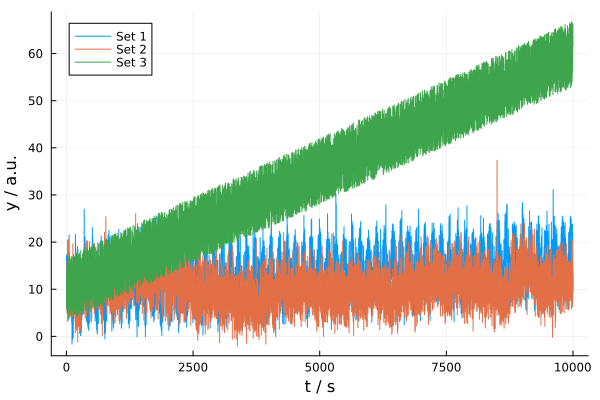

In [40]:
@df get_Data(1) plot(:y,label="Set 1")
@df get_Data(2) plot!(:y,label="Set 2")
@df get_Data(3) plot!(:y,label="Set 3",xlabel="t / s",ylabel="y / a.u.")

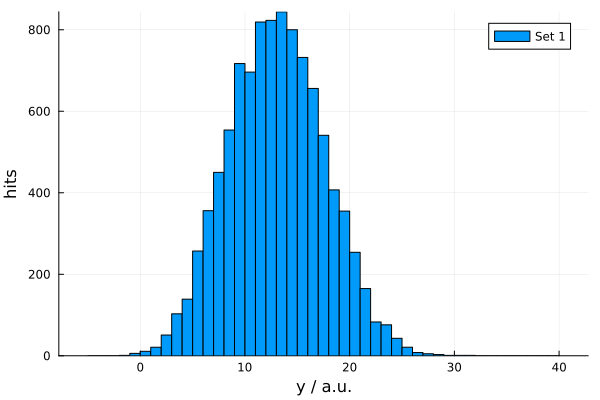

In [43]:
 plot(get_hist(get_Data(1), -5:1:40), label="Set 1", xlabel="y / a.u.",ylabel="hits")

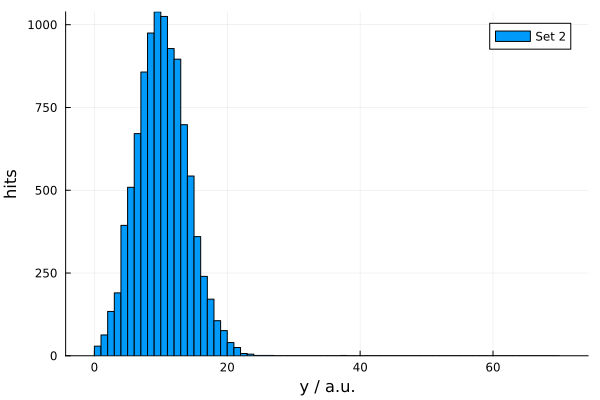

In [50]:
plot(get_hist(get_Data(2), -0:1:70), label="Set 2", xlabel="y / a.u.",ylabel="hits")

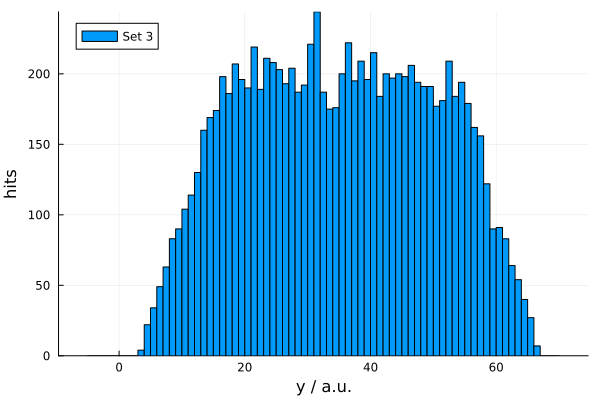

In [51]:
plot(get_hist(get_Data(3), -5:1:70), label="Set 3", xlabel="y / a.u.",ylabel="hits")

In [126]:
τs_used

198-element Vector{Int64}:
    1
    2
    3
    4
    5
    6
    7
    8
    9
   10
    ⋮
 1000
 1111
 1250
 1428
 1666
 2000
 2500
 3333
 5000

In [144]:
@df get_Data(1) sqrt(allan_Var(binning(:y,floor.(Int,10000 ./K)[end])))

2.1272515552402353

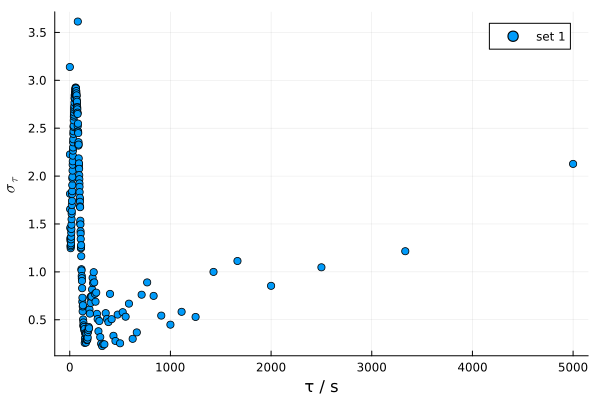

In [149]:
@df get_Data(1) scatter(floor.(Int,10000 ./K), x-> sqrt(allan_Var(binning(:y,Int(x)))),label="set 1",xlabel="τ / s",ylabel=L"\sigma_\tau" )

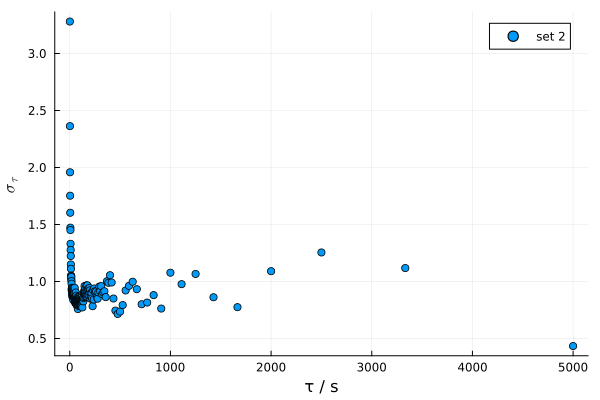

In [148]:
@df get_Data(2) scatter(floor.(Int,10000 ./K), τ-> sqrt(allan_Var(binning(:y,Int(τ)))),label="set 2",xlabel="τ / s",ylabel=L"\sigma_\tau")

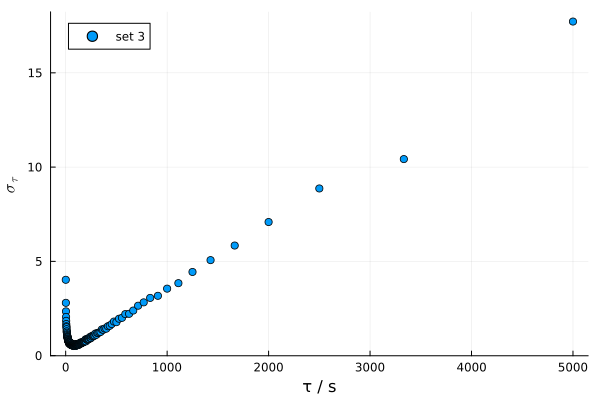

In [147]:
@df get_Data(3) scatter(floor.(Int,10000 ./K), τ-> sqrt(allan_Var(binning(:y,Int(τ)))),label="set 3",xlabel="τ / s",ylabel=L"\sigma_\tau")